Manna Paul,172010026016,ETE,Barak Valley Engineering College.

In [1]:
import numpy as np #n-dimensional array
import pandas as pd #data analysis and manipulation tool
import seaborn as sns #plotting graphs , histograms etc
import matplotlib.pyplot as plt #plotting charts,graphs etc
%matplotlib inline

In [2]:
mp = pd.read_csv("dataset.csv") #loading data from dataset

In [3]:
mp.head() #prints starting 5 rows from the dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
mp.info() #displays all info/stats associated with the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
mp.isnull().sum() #empty values present

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
mp.tail() #prints the last 5 rows from the dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [7]:
n_col = mp.select_dtypes(include= np.number).columns
print("Numerical column : ",n_col)   #prints all colums having number/numerical value

c_col = mp.select_dtypes(exclude= np.number).columns
print("Character column : ",c_col)    #prints all colums having character 

Numerical column :  Index(['MILES*'], dtype='object')
Character column :  Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*'], dtype='object')


In [8]:
mp.drop(mp.tail(1).index, inplace=True) #dropping the last row since it has all null values and is not required

In [9]:
mp.isnull().sum()  #prints the sum of null values in rows

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

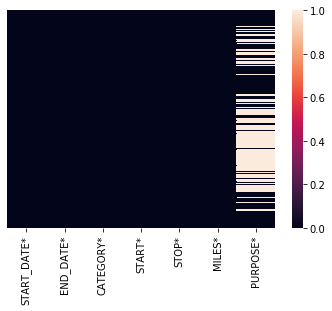

In [10]:
sns.heatmap(mp.isnull(),yticklabels=False) #plot heatmap of the features using seaborn

In [11]:
mp.head()

NameError: name 'dpp' is not defined

In [ ]:
mp.describe() #prints all statistics associated with numerical columns

In [ ]:
mp['START_DATE*']=mp['START_DATE*'].astype('datetime64[ns]')
mp['END_DATE*']=mp['END_DATE*'].astype('datetime64[ns]')

In [ ]:
mp['Time'] = mp['END_DATE*']-mp['START_DATE*'] #find time required by substracting the two values
mp.head()

In [ ]:
mp['Time'] = mp['Time'].dt.total_seconds()/60.0
mp['Time'] = mp['Time'].astype('float')
mp.head()

In [ ]:
mp['KM']= mp['MILES*']*1.609 #converted miles to km for better understanding

In [ ]:
mp.head()

In [ ]:
mp.drop(['MILES*'],axis=1) #dropped miles since km is present

In [ ]:
mp['speed']=(mp['KM']/mp['Time'])*60 #time:min & speed:kmph

In [ ]:
mp.head()

In [ ]:
mp.tail()

In [ ]:
#HOUR DAY TRANSFORMATION

In [14]:
import datetime
import calendar

In [15]:
mp['START_DATE*'] = pd.to_datetime(mp['START_DATE*'], format="%m/%d/%Y %H:%M") 
mp['END_DATE*'] = pd.to_datetime(mp['END_DATE*'], format="%m/%d/%Y %H:%M")

In [16]:
hour=[]  #empty list
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in mp['START_DATE*']:
    hour.append(x.hour) #adding/appending the values to above empty list
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
mp['HOUR']=hour #creatig columns
mp['DAY']=day
mp['DAY_OF_WEEK']=dayofweek
mp['MONTH']=month
mp['WEEKDAY']=weekday

In [17]:
mp.head() #updated dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday


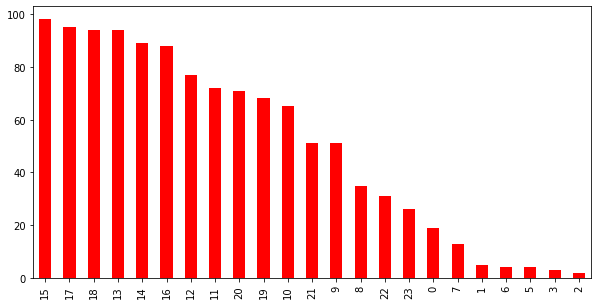

In [18]:
mp['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='red') #trips per hour

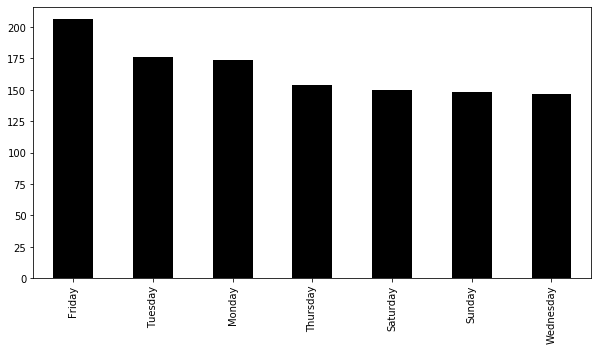

In [19]:
mp['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='black') #trips per day of week

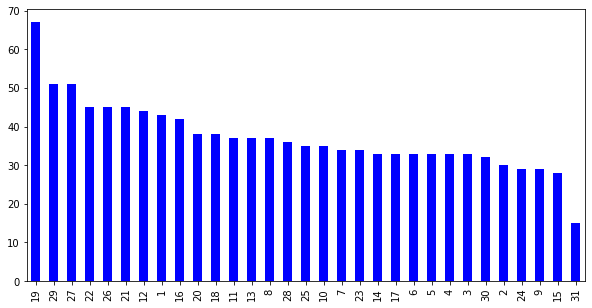

In [20]:
mp['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue') #trips per day of the month

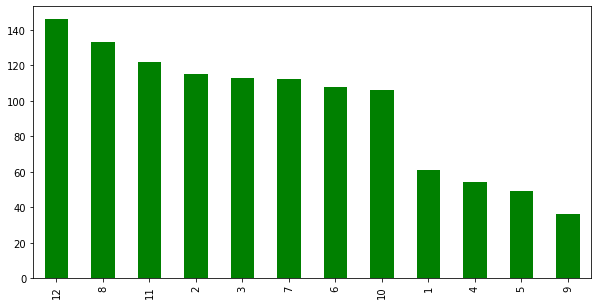

In [21]:
mp['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green') #trips in month, month 12 has highest number of trips as depicted in the figure

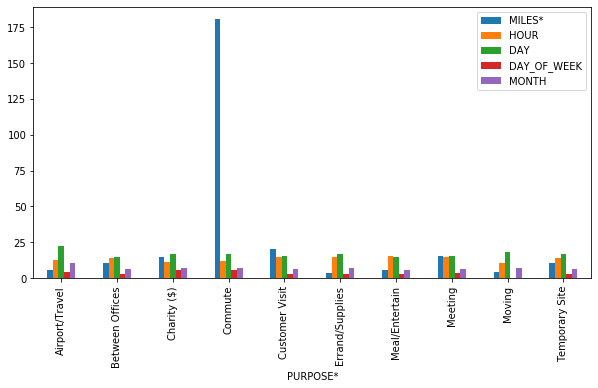

In [22]:
mp.groupby('PURPOSE*').mean().plot(kind='bar',figsize=(10,5)) #overall analysis